In [17]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [18]:
#Load data & print samples
df = pd.read_csv('data/Reddit/all_text_labeled.csv',encoding='latin-1')
df.head()


,v1,v2
0,0,us family members like family like feelings ex...
1,0,mills career way better bentham like joseph sm...
2,0,mine uses strait razor much love clippers love...
3,0,fast thank
4,0,guy professional good highly doubt misses often


In [19]:
# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

#Sample post modifications
df.head()

,Category,Text
0,0,us family members like family like feelings ex...
1,0,mills career way better bentham like joseph sm...
2,0,mine uses strait razor much love clippers love...
3,0,fast thank
4,0,guy professional good highly doubt misses often


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Exploratory Data Analysis</span></b>

In [20]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 20046


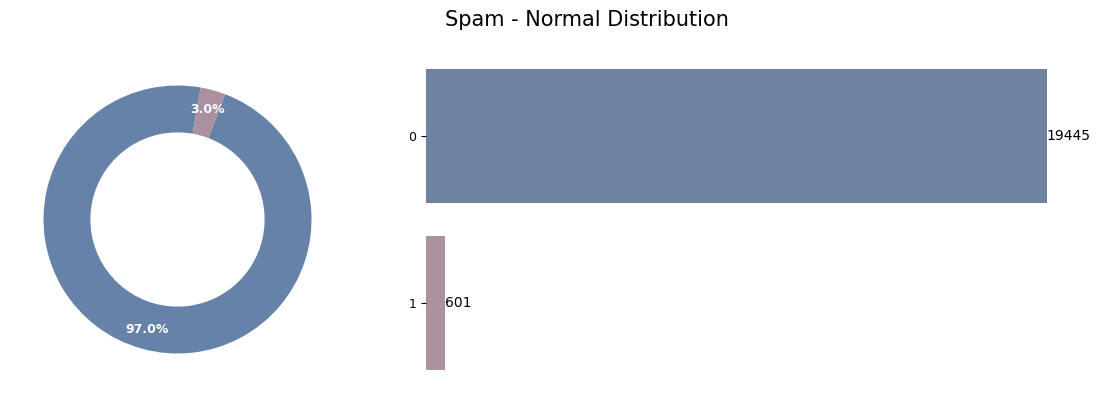

In [41]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax = ax.flatten()
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
colors =["#6782a8", "#ab90a0" ]
# Donut Chart
wedges, texts, autotexts = ax[0].pie(
    value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
    wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
# circle
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax[0].add_artist(centre_circle)

# Count Plot
sns.countplot(data=df, y=df['Category'], ax=ax[1], palette=colors, order=labels)
for i, v in enumerate(value_counts):
    ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
sns.despine(left=True, bottom=True)
plt.yticks(fontsize=9,color='black')
ax[1].set_ylabel(None)
plt.xlabel("")
plt.xticks([])
fig.suptitle('Spam - Normal Distribution', fontsize=15)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [22]:
#Descriptive Summary of the dataset
df.describe()

,Category
count,20046.000000
mean,0.029981
std,0.170539
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [23]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df['Text']=df['Text'].apply(str)
df['Length']=df['Text'].apply(len)
display(df.head())

#distribution of the data
import plotly.express as px
fig = px.histogram(df, x='Length', marginal='rug',
                   title='Histogram of Text Length')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

,Category,Text,Length
0,0,us family members like family like feelings ex...,51
1,0,mills career way better bentham like joseph sm...,245
2,0,mine uses strait razor much love clippers love...,222
3,0,fast thank,10
4,0,guy professional good highly doubt misses often,47


In [24]:
#Lets check the distribution against categories
import plotly.express as px
fig = px.histogram(df, x='Length', color='Category', marginal='rug',
                   title='Histogram of Text Length by Category')
fig.update_layout(
    xaxis_title='Length',
    yaxis_title='Frequency',
    showlegend=True)

In [25]:
! pip install wordcloud


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Bag of Words </span></b>

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(text, df['Category'], test_size=0.33, random_state=100)
text

<20046x38677 sparse matrix of type '<class 'numpy.int64'>'
	with 293534 stored elements in Compressed Sparse Row format>

In [27]:
#Let's print the dimentions of the train & test dataset
display('X-Train :', x_train.shape)
display('X-Test :',x_test.shape)
display('Y-Train :',y_train.shape)
display('X-Test :',y_test.shape)

'X-Train :'

(13430, 38677)

'X-Test :'

(6616, 38677)

'Y-Train :'

(13430,)

'X-Test :'

(6616,)

## <b><span style='color:#28838a'> | </span><span style='color:#fc7651'> Training the ML models </span></b>

### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Neural Network </span></b>

In [28]:
%%time
from sklearn.neural_network import MLPClassifier

mlp_classifier_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000) 
mlp_classifier_model.fit(x_train, y_train)  

prediction = mlp_classifier_model.predict(x_test)

# Calculate and print classification metrics
print("MLP Classifier")
print("Accuracy score: {:.2f}".format(accuracy_score(y_test, prediction)))
print("Precision score: {:.2f}".format(precision_score(y_test, prediction)))
print("Recall score: {:.2f}".format(recall_score(y_test, prediction)))
print("F1 score: {:.2f}".format(f1_score(y_test, prediction)))


MLP Classifier
Accuracy score: 1.00
Precision score: 1.00
Recall score: 0.92
F1 score: 0.96
CPU times: total: 3min 35s
Wall time: 3min 27s


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Multinomial Naive Bayes </span></b>

In [29]:
%%time
# Multinomial Naive Bayes model 
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(x_train, y_train)  # Train the model

prediction = multinomial_nb_model.predict(x_test)

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Multinomial NB
Accuracy score: 0.9903264812575574
Precision score: 0.7982832618025751
Recall score: 0.916256157635468
F1 score: 0.8532110091743118
CPU times: total: 15.6 ms
Wall time: 12 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Bernoulli Naive Bayes </span></b>

In [30]:
%%time
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(x_train, y_train)

prediction = bernoulli_nb_model.predict(x_test)

#Evaluation
print("Bernoulli NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

Bernoulli NB
Accuracy score: 0.9817110036275696
Precision score: 0.9361702127659575
Recall score: 0.43349753694581283
F1 score: 0.5925925925925927
CPU times: total: 31.2 ms
Wall time: 17 ms


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Confusion Matrix </span></b>

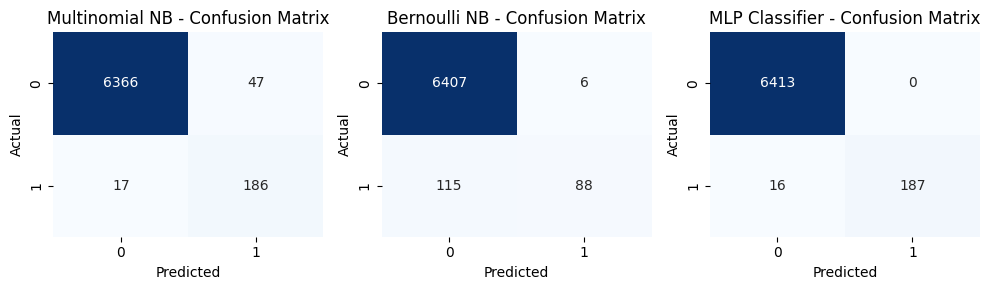

In [31]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("Multinomial NB", multinomial_nb_model), ("Bernoulli NB", bernoulli_nb_model),("MLP Classifier", mlp_classifier_model) ]

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()


### <b><span style='color:#fc7651'> | </span><span style='color:#28838a'> Metric Comparison Heatmap </span></b>

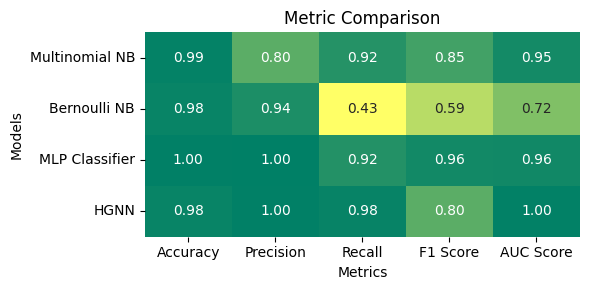

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#Metric Comparison Heatmap
metric_data = []
for model_name, model in models:
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    auc = roc_auc_score(y_test, prediction)
    metric_data.append([accuracy, precision, recall, f1, auc])
metric_data.append([0.9811, 0.9969, 0.9839, 0.7971, 0.9954])
metric_labels = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC Score"]
#heatmap for metric comparison
plt.figure(figsize=(6, 3))
labels = [model_name for model_name, _ in models]
labels.append("HGNN")
sns.heatmap(metric_data, annot=True, fmt=".2f", cbar=False, cmap="summer_r", xticklabels=metric_labels, yticklabels=labels)
plt.title("Metric Comparison")
plt.yticks(rotation=0)
plt.xlabel("Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

# Acc: 0.9811
# Precision: 0.9969
# Recall: 0.9839
# F1: 0.7971
# AUC: 0.9954